# N-Dimensional Derivatives, Gradient, and Hessian

## Multivariate Functions from $\mathbb{R}^n$ to $\mathbb{R}$
 In mathematics, a multivariate function is a function that takes multiple variables as inputs and produces a single scalar output. These functions are fundamental in many areas, including physics, engineering, economics, and machine learning.

 A function $f : \mathbb{R}^n \to \mathbb{R}$ is called a multivariate function if it maps an $n$-dimensional vector $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ to a real number $f(\mathbf{x})$.

For example, the function $f(x, y) = x^2 + y^2$ is a multivariate function from $\mathbb{R}^2$ to $\mathbb{R}$. This function takes a point $(x, y)$ in the two-dimensional plane and maps it to a real number, which represents the value of $f$ at that point.

 ### Examples
 1. **Linear Function**:
    $$ f(x, y) = 2x + 3y $$

 2. **Quadratic Function**:
    $$ f(x, y) = x^2 + y^2 $$

 3. **Rosenbrock Function**:
    $$ f(x, y) = (1 - x)^2 + 100(y - x^2)^2 $$

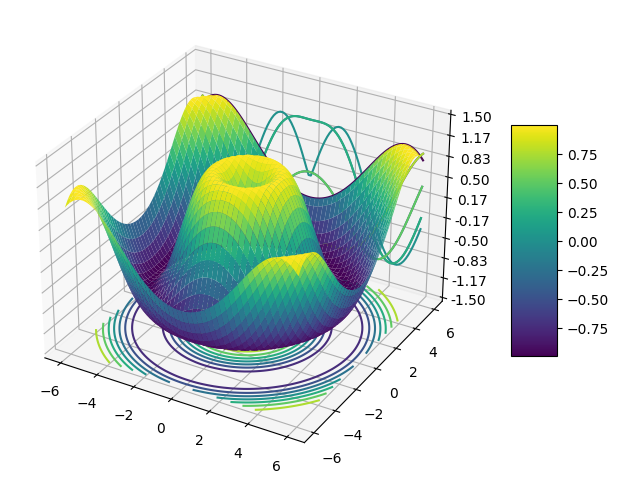

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to plot
def function_to_plot(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

# Create a meshgrid
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = function_to_plot(X, Y)

# Create the figure and the 3D axis
fig = plt.figure(figsize=(10, 6), dpi=100)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add contour plot
ax.contour(X, Y, Z, zdir='z', offset=-1.5, cmap='viridis')
ax.contour(X, Y, Z, zdir='y', offset = np.max(Y), cmap='viridis')

# Customize the z axis
ax.set_zlim(-1.5, 1.5)
ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FuncFormatter(lambda z, _: f'{z:.02f}'))

# Add color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


## Introduction to N-Dimensional Derivatives
 In the context of multivariable calculus, the concept of a derivative extends to functions of several variables. For a function $f : \mathbb{R}^n \to \mathbb{R}$, the derivative at a point is represented by the gradient vector, which contains all the partial derivatives of the function.

## Gradient
The gradient of a function $f$ at a point $\mathbf{x} \in \mathbb{R}^n$ is a vector of its first-order partial derivatives. Mathematically, the gradient is defined as:
 $$ \nabla f(\mathbf{x}) = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n} \right] $$

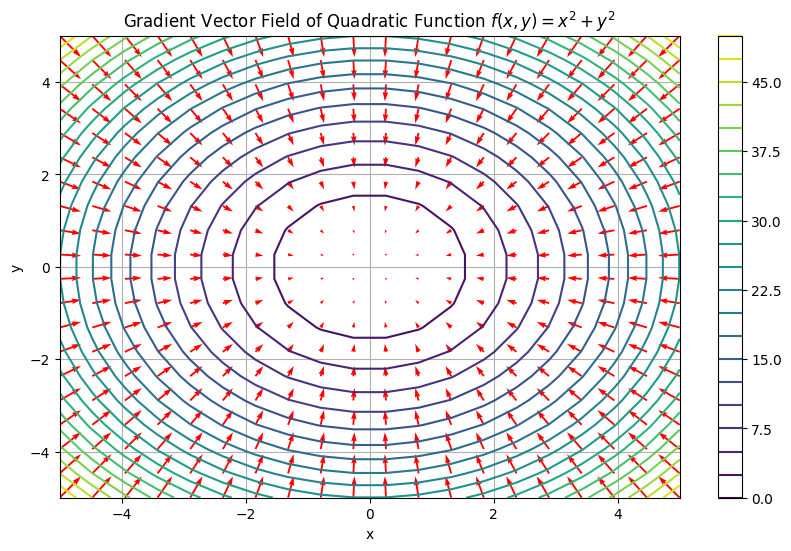

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function
def quadratic_function(x, y):
    return x**2 + y**2

# Define the gradient of the quadratic function
def gradient_quadratic_function(x, y):
    dfdx = 2 * x
    dfdy = 2 * y
    return dfdx, dfdy

# Create a grid of points
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)

# Compute the function values
Z = quadratic_function(X, Y)

# Compute the gradient at each point
U, V = gradient_quadratic_function(X, Y)

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the contour of the function
contour = plt.contour(X, Y, Z, 20, cmap='viridis')
plt.colorbar(contour)

# Plot the gradient vector field
plt.quiver(X, Y, -U, -V, color='red')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Vector Field of Quadratic Function $f(x, y) = x^2 + y^2$')
plt.grid(True)

plt.show()


## Hessian
The Hessian matrix is a square matrix of second-order mixed partial derivatives of a scalar-valued function. For a function $f : \mathbb{R}^n \to \mathbb{R}$, the Hessian is defined as:
 $$ H(f) = \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
 \vdots & \vdots & \ddots & \vdots \\
 \frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2} \end{bmatrix} $$

## Taylor Series for Functions from $\mathbb{R}^n$ to $\mathbb{R}$
The Taylor series expansion of a multivariable function $f$ around a point $\mathbf{a} \in \mathbb{R}^n$ is given by:
$$ f(\mathbf{x}) = f(\mathbf{a}) + \nabla f(\mathbf{a}) \cdot (\mathbf{x} - \mathbf{a}) + \frac{1}{2} (\mathbf{x} - \mathbf{a})^T H(f) (\mathbf{x} - \mathbf{a}) + \cdots $$

(-10.0, 10.0)

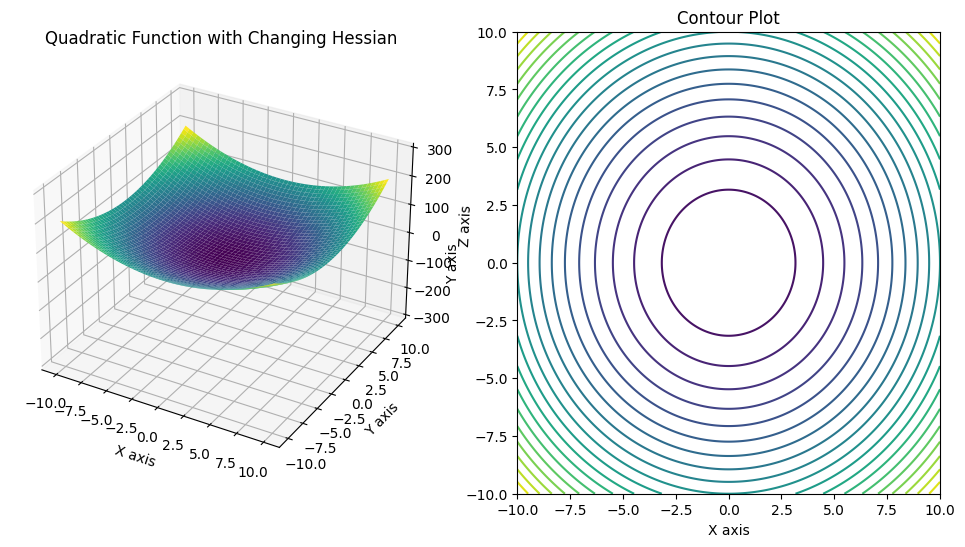

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML


# Define the quadratic function
def quadratic_function(x, y, A):
    return A[0, 0] * x**2 + A[1, 1] * y**2 + 2 * A[0, 1] * x * y

# Create a meshgrid
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)

# Initialize Hessian matrix
A_init = np.array([[1, 0], [0, 1]])
Z = quadratic_function(X, Y, A_init)

# Create the figure and axis
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Plot the initial surface
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax1.set_zlim(-300, 300)
ax1.set_title('Quadratic Function with Changing Hessian')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')

# Plot the initial contour
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.set_title('Contour Plot')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_xlim(-10, 10)
ax2.set_ylim(-10, 10)



In [13]:
# Function to update the plot
def update(num):
    A = np.array(
        [
            [0.1 + 0.1 * num, 0.1 * num],
            [0.1 * num, 0.1 - 0.1 * num]
        ]
    )

    Z = quadratic_function(X, Y, A)

    ax1.clear()
    ax2.clear()

    # Update the surface plot
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax1.set_zlim(-300, 300)
    ax1.set_title('Quadratic Function with Changing Hessian')
    ax1.set_xlabel('X axis')
    ax1.set_ylabel('Y axis')
    ax1.set_zlabel('Z axis')

    # Update the contour plot
    contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
    ax2.set_title('Contour Plot')
    ax2.set_xlabel('X axis')
    ax2.set_ylabel('Y axis')
    ax2.set_xlim(-10, 10)
    ax2.set_ylim(-10, 10)

    # Calculate eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eig(A)
    for i in range(len(eigvals)):
        eigvec = eigvecs[:, i] * eigvals[i]
        ax2.quiver(0, 0, eigvec[0], eigvec[1], angles='xy', scale_units='xy', scale=1, color='red')

    # Add Hessian matrix annotation
    ax2.annotate(f'Matrix A = \n{A}', xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=25, interval=100, blit=False)

# Display the animation
HTML(anim.to_html5_video())